In [1]:
# Notebook to test the classes and all. Just a rough cookbook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
import seaborn as sb
from tqdm import tqdm

import torch as th
import os
import pyro
import pyro.contrib.gp as gp
import pyro.distributions as dist
smoke_test = ('CI' in os.environ)
pyro.set_rng_seed(0)

from datetime import datetime

import matplotlib as mpl
from matplotlib import rc
mpl.rcParams['font.family'] = ['times new roman'] # default is sans-serif
rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
datetime = datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
%load_ext autoreload
%autoreload 2

In [2]:
def function(x):
    """
    Fn with both local and global minimum. Forrester et al. (2008)
    Parameters
    ----------
    x :

    Returns
    -------

    """
    return (6 * x - 2)**2 * np.sin(12 * x - 4)

In [3]:
def f_exact(eval_points):
        """
        Wrapper around the exact function that prevents re-evaluation at a point

        Parameters
        ----------
        eval_points : numpy.ndarray
            Array of points at which the function needs to be evaluated

        Returns
        -------
        Y : numpy.ndarray
            Array of value of the function at the eval_points
        """
        #X = np.atleast_2d(eval_points)
        X = eval_points
        Y = np.zeros((X.shape[0]))
        for idx, x in enumerate(X):
            key = tuple(x)
            #if key in self.f_dict.keys():
            #    Y[idx, 0] = self.f_dict[key]
            #else:
            Y[idx] = function(x)
                #self.f_dict[key] = Y[idx, 0]
        return Y


In [121]:
def ARD(model,x):
    """
    model : GPRegressopn object
    """
    feature_space_input_dim = np.shape(x)[1]
    model.kernel.lengthscale = pyro.nn.PyroSample(dist.InverseGamma(2*th.ones(feature_space_input_dim), 1.0).to_event())
    model.kernel.variance = pyro.nn.PyroSample(dist.InverseGamma(2.0, 1.0))
    #gpr.noise = pyro.nn.PyroSample(dist.Uniform(1.0, 30.0))
    model.noise = pyro.nn.PyroSample(dist.InverseGamma(2.0, 1.0))

In [4]:
def fit(eval_point):
    """

    """
    eval_point = np.reshape(eval_point,(-1,1))
    feature_space_input_dim = np.shape(eval_point)[1]
    x = th.from_numpy(eval_point)
    # defining the gp object

    # TODO : Can use mattern52 kertnel also
    # kernel = gp.kernels.RBF(input_dim=feature_space_input_dim, variance=th.tensor(1.),
    #                         lengthscale=0.1*th.ones(feature_space_input_dim))

    # computing the exact function value
    y = f_exact(x)
    gpr = gp.models.GPRegression(x, th.from_numpy(y), gp.kernels.Matern52(input_dim=1),noise=th.tensor(0.1), jitter=1.0e-4)
    # Calling the ARD kernel
    #ARD(gpr,x)

    # learning
    optimizer = th.optim.Adam(gpr.parameters(), lr=0.001)
    loss = gp.util.train(gpr, optimizer)
    return gpr,loss

In [5]:
def predict(model, x):
    """

    """
    x = np.reshape(x,(-1,1))
    mean, cov = model(th.from_numpy(x), full_cov =False, noiseless = False) # Remove or include observational noise in prediction?

    return mean, cov

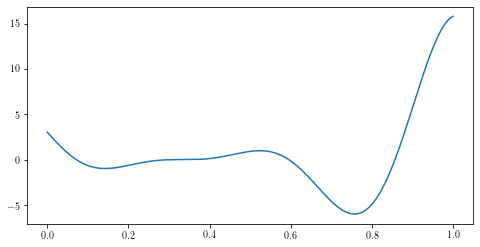

In [129]:
## tests

# Generating traini data

x = np.linspace(0, 1,500)
plt.figure(figsize=(8, 4))
plt.plot(x, function(x))
plt.show()

In [27]:
X = th.tensor([0.0, 0.33,0.52310, 0.66,0.725, 1.0])
gpr, loss = fit(X.numpy())

In [28]:
Xnew = th.linspace(-0.1, 1.1,100)
m, var = predict(gpr,Xnew.numpy())

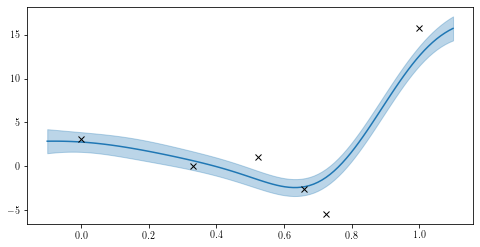

In [29]:
plt.figure(figsize=(8, 4))
with th.no_grad():
    plt.plot(Xnew, m)
    plt.plot(gpr.X.numpy(), gpr.y.numpy(), "kx")
    sd = var.sqrt()
    plt.fill_between(Xnew, m - 2*sd, m + 2*sd,
                             color="C0", alpha=0.3)  # plot uncertainty intervals
    plt.show()

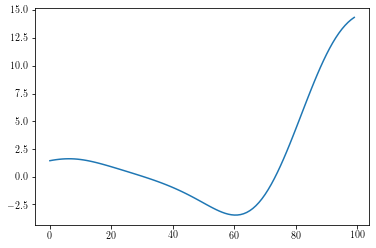

In [30]:
with th.no_grad():
    plt.plot(m - 2* sd)

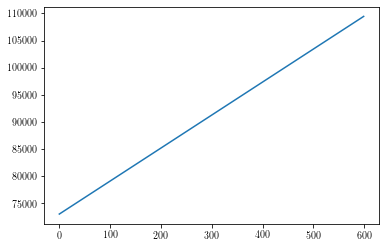

In [82]:
plt.plot(grad)

In [12]:
tmp = np.transpose(np.atleast_2d(x))

In [49]:
x = np.reshape(x,(-1,1))

In [50]:
x.shape

(100, 1)